In [3]:
# Import all relevant modules/libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
files_to_load = ['vx.txt', 'vy.txt', 'vz.txt', 'ejecta_distribution.dat', 'weights_xnu_mg24.txt']

In [5]:
# Load the text files
print('Loading files')
vx = np.loadtxt('vx.txt')
print('Loaded vx.txt')
vy = np.loadtxt('vy.txt')
print('Loaded vy.txt')
vz = np.loadtxt('vz.txt')
print('Loaded vz.txt')
ejecta = np.loadtxt('ejecta_distribution.dat')
print('Loaded ejecta_distribution.txt')
weight = np.loadtxt('weights_xnu_mg24.txt')
print('Loaded weights_xnu_mg24.txt')

Loading files
Loaded vx.txt
Loaded vy.txt
Loaded vz.txt
Loaded ejecta_distribution.txt
Loaded weights_xnu_mg24.txt


In [6]:
species = np.genfromtxt('/home/user1/Documents/PhD/utils/species_table_2d_model.txt', dtype=None, encoding='UTF-8', names=True)

In [7]:
species_label = []
for i in range(len(species)):
    species_label.append(species[i][1])
print(species_label)

['n', 'p', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'fe52', 'fe54', 'ni56', 'fe56', 'fe60', 'ni62']


In [8]:
# Define useful variables
nbin = 36
nnuc = 22
vbin_pos = np.arange(nbin+1)/(nbin+1)*18e8
vbin_pos_neg = np.arange(-(nbin+1), nbin+1)/(nbin+1)*18e8
qx = 1200
qy = 112
qz = 148

In [9]:
vx = vx.reshape((qx, qy, qz))
vy = vy.reshape((qx, qy, qz))
vz = vz.reshape((qx, qy, qz))

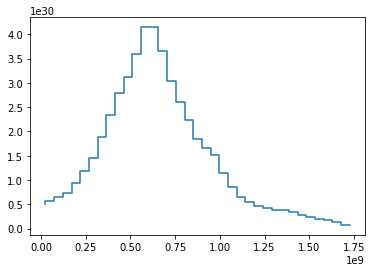

In [10]:
plt.step(ejecta[0,:],ejecta[9+1,:], label='Radial')
plt.show()

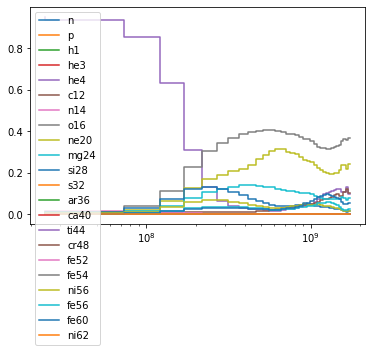

In [11]:
for inuc in range(nnuc):
    plt.step(ejecta[0,:],ejecta[inuc+1,:]/ejecta[nnuc+1,:], label=species_label[inuc])
plt.legend()
plt.xscale('log')

[16, 17, 18, 19, 20, 21, 22]


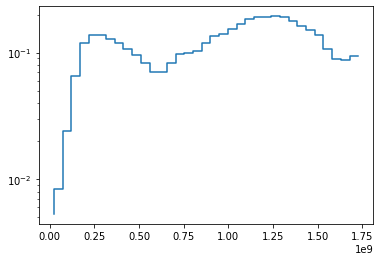

In [15]:
iron_group_indices = []
for i in range(len(species)):
    if species[i][1][:2] == 'cr' or species[i][1][:2] == 'fe' or species[i][1][:2] == 'ni':
        iron_group_indices.append(i+1)
print(iron_group_indices)
iron_group = ejecta[iron_group_indices,:]/ejecta[nnuc+1,:]
iron_group = np.sum(iron_group, axis=0)
plt.step(ejecta[0,:], iron_group)
plt.yscale('log')

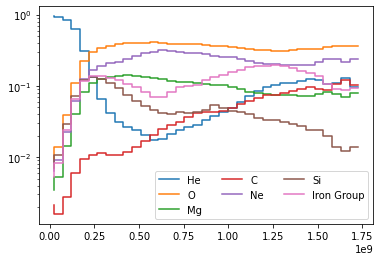

In [31]:
species_of_interest = [4, 7, 9, 5, 8, 10]
for inuc in species_of_interest:
    plt.step(ejecta[0,:],ejecta[inuc+1,:]/ejecta[nnuc+1,:], label=''.join(i for i in species_label[inuc] if not i.isdigit()).capitalize())
plt.step(ejecta[0,:], iron_group, label='Iron Group')
plt.yscale('log')
plt.legend(ncol=3)
plt.savefig('mass_dist_velocity_space.pdf')

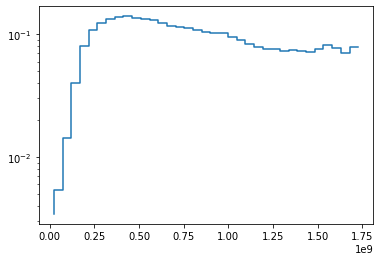

In [32]:
plt.step(ejecta[0,:],ejecta[10,:]/ejecta[nnuc+1,:])
plt.yscale('log')
plt.savefig('magnesium_mass_fraction_log.pdf')

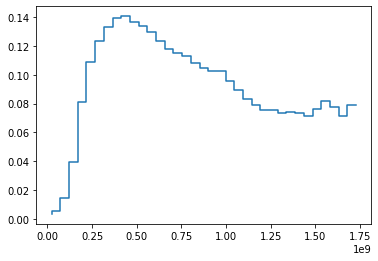

In [33]:
plt.step(ejecta[0,:],ejecta[10,:]/ejecta[nnuc+1,:])
plt.savefig('magnesium_mass_fraction.pdf')

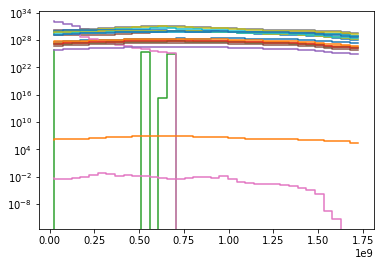

In [22]:
for inuc in range(nnuc):
    plt.step(ejecta[0,:],ejecta[inuc+1,:])
plt.yscale('log')

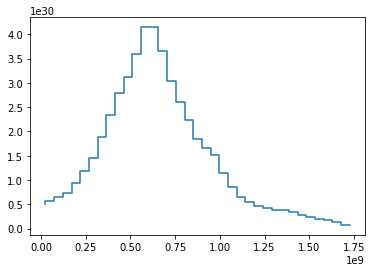

In [36]:
plt.step(ejecta[0,:],ejecta[9+1,:])
# plt.yscale('log')
plt.savefig('magnesium_radial_velocity.pdf')

In [24]:
def get_n_vector(theta_obs, phi_obs):
    nx = np.sin(theta_obs) * np.cos(phi_obs)
    ny = np.sin(theta_obs) * np.sin(phi_obs)
    nz = np.cos(theta_obs)
    return([nx, ny, nz])

def v_projection(vx, vy, vz, theta_obs, phi_obs):
    n = get_n_vector(theta_obs, phi_obs)
    vproj = vx*n[0] + vy*n[1] + vz*n[2]
    return(vproj)

In [25]:
max_radial = np.argmax(ejecta[10])

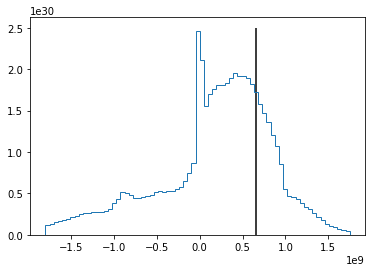

In [26]:
plt.hist(v_projection(vx, vy, vz, np.pi/2, 0).reshape((qx*qy*qz)), bins = vbin_pos_neg, weights=weight, histtype='step', label='Projected ' + str('{:.2f}'.format(0)))
plt.vlines(ejecta[0,max_radial], ymin=0, ymax=2.5e30, color='black', label='Radial Peak')
plt.show()

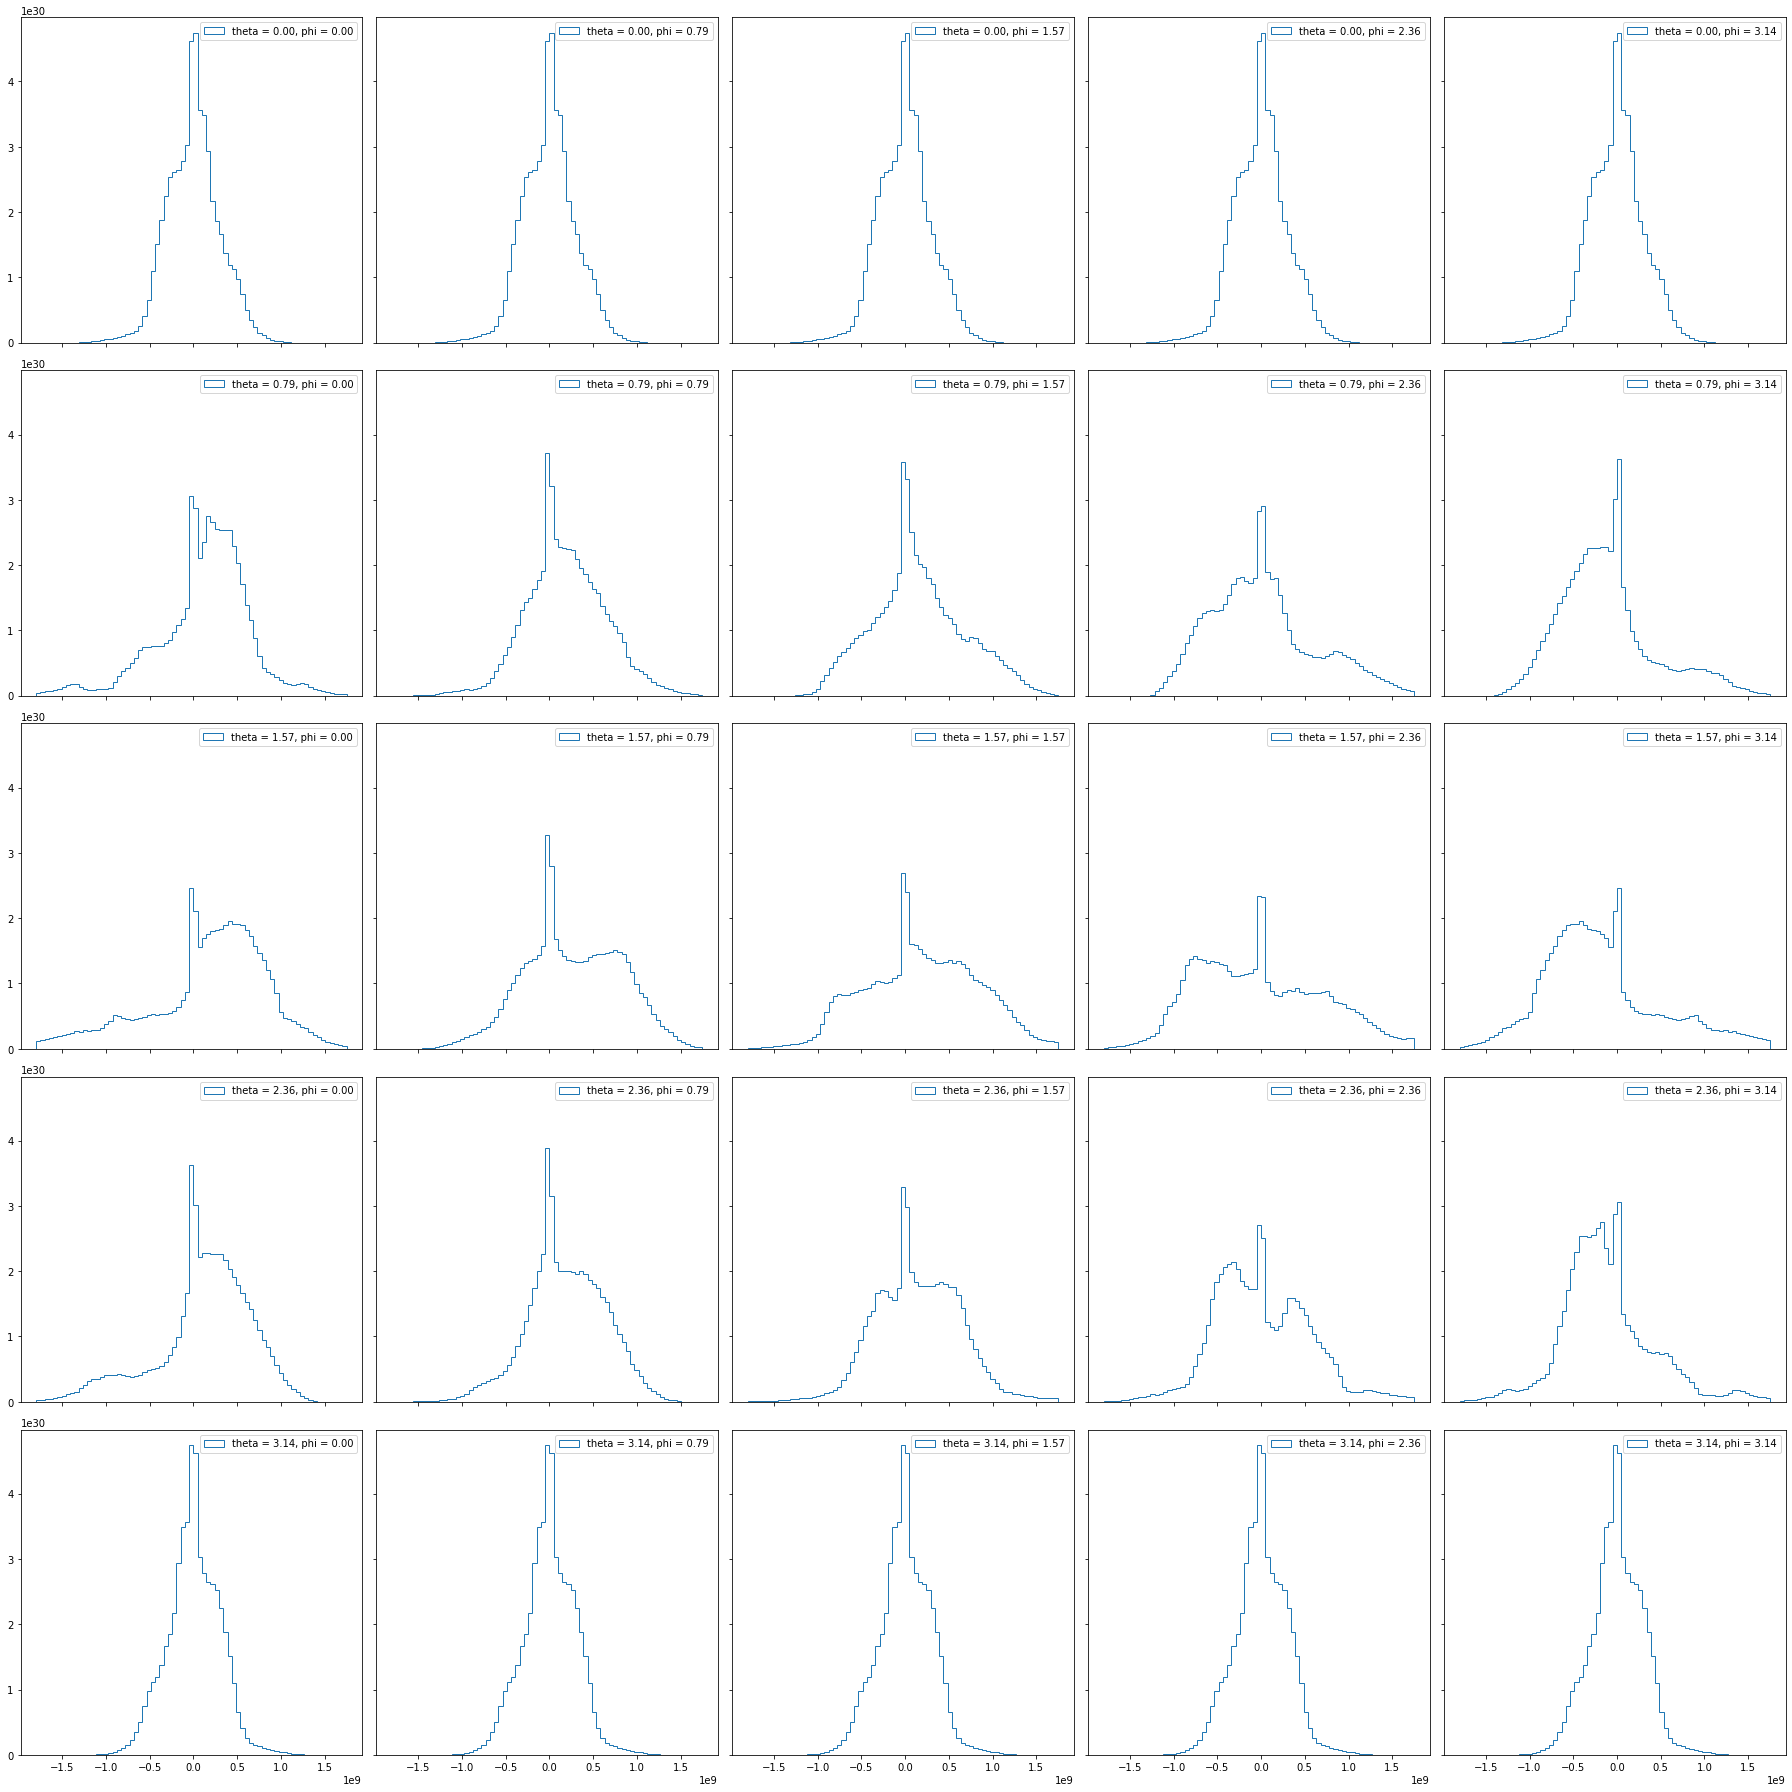

In [29]:
plt.clf()
plt.close()

theta_step = np.pi/4
phi_step = np.pi/4
th_len = int(np.pi/theta_step)+1
phi_len = int(np.pi/phi_step)+1

fac = 5

fig, axes = plt.subplots(nrows=th_len, ncols=phi_len, figsize = (phi_len*fac,th_len*fac), sharex=True, sharey=True)

th_counter = 0
for theta in tqdm(np.arange(0, np.pi+theta_step, theta_step), desc='Theta loop', leave=True):
    phi_counter = 0
    for phi in tqdm(np.arange(0, np.pi+phi_step, phi_step), desc='Phi loop', leave=False):
        axes[th_counter, phi_counter].hist(v_projection(vx, vy, vz, theta, phi).reshape((qx*qy*qz)), bins = vbin_pos_neg, weights=weight, histtype='step', label='theta = ' + str('{:.2f}'.format(theta)) + ', phi = ' + str('{:.2f}'.format(phi)))
        axes[th_counter, phi_counter].legend()
#         axes[th_counter, phi_counter].vlines(ejecta[0,max_radial], ymin=0, ymax=5e30, color='black', label='Radial Peak')
        phi_counter += 1
    th_counter += 1

fig.tight_layout()
plt.savefig('S3.5_envel_new.o00000040_projected_velocity_Mg24.pdf')